In [1]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Wczytywanie danych
data = pd.read_csv("weatherAUS.csv")

In [3]:

# Podstawowe informacje o danych
print("Pierwsze 5 wierszy danych:")
display(data.head())

print("\nPodstawowe informacje:")
data.info()

print("\nPodstawowe statystyki opisowe:")
display(data.describe())

Pierwsze 5 wierszy danych:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No



Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
data.dropna(subset="RainTomorrow", inplace=True)

In [5]:
def convert_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [6]:
data["RainTomorrow"] = data["RainTomorrow"].apply(lambda x:convert_to_binary(x))

In [7]:
data["RainToday"] = data["RainToday"].apply(lambda x:convert_to_binary(x))

In [8]:
# Analiza brakujących danych
print("Brakujące wartości w kolumnach:")
display(data.isnull().sum())


Brakujące wartości w kolumnach:


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

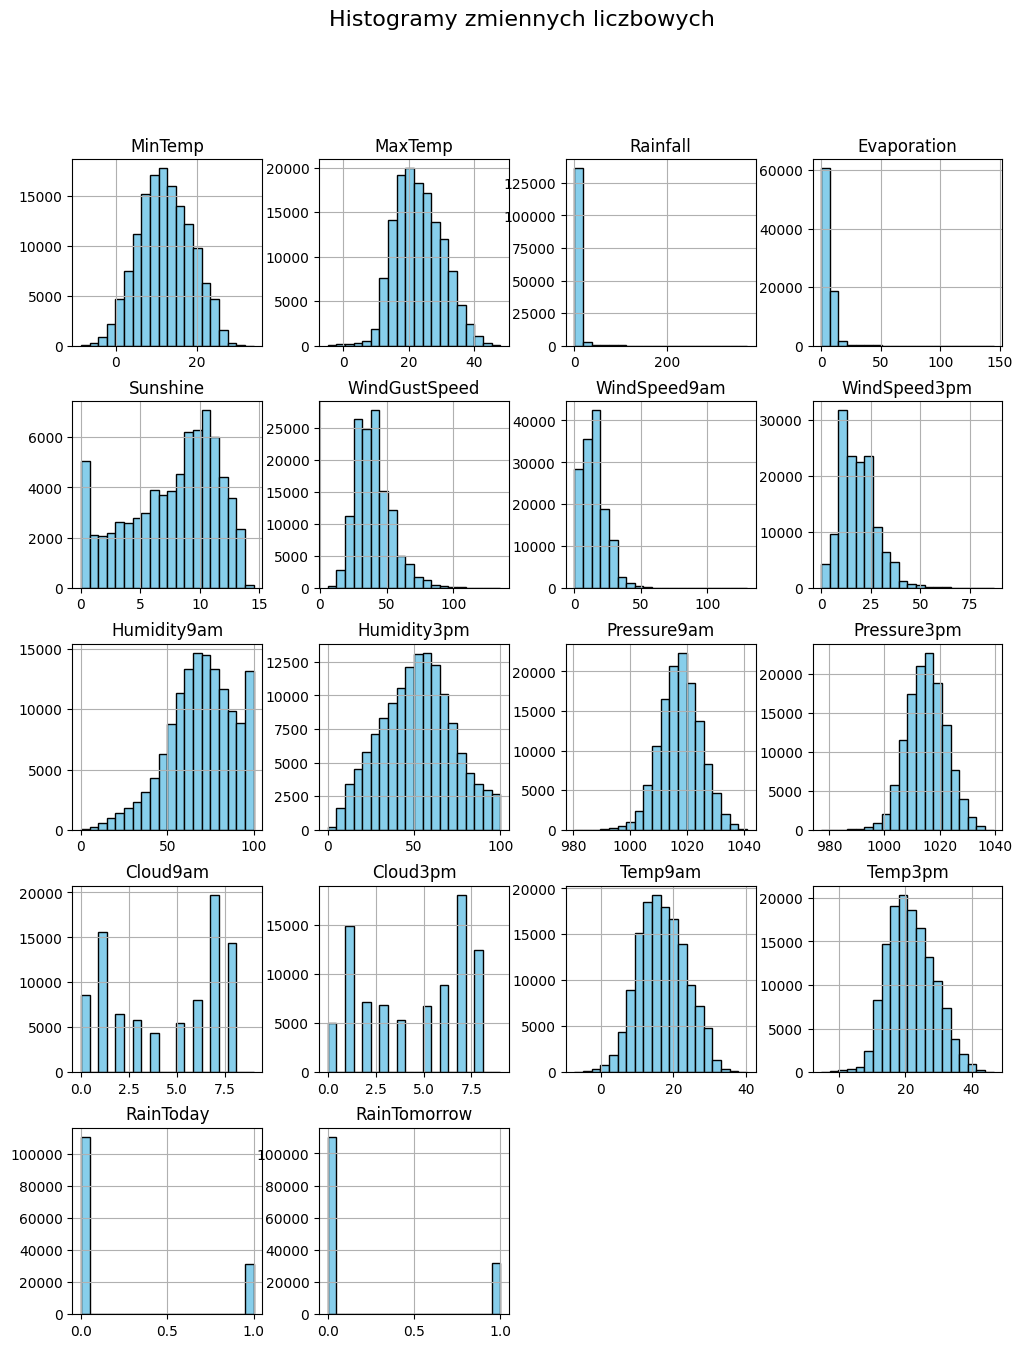

In [9]:
# Rozkład zmiennych liczbowych
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(bins=20, figsize=(12, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histogramy zmiennych liczbowych", fontsize=16)
plt.show()

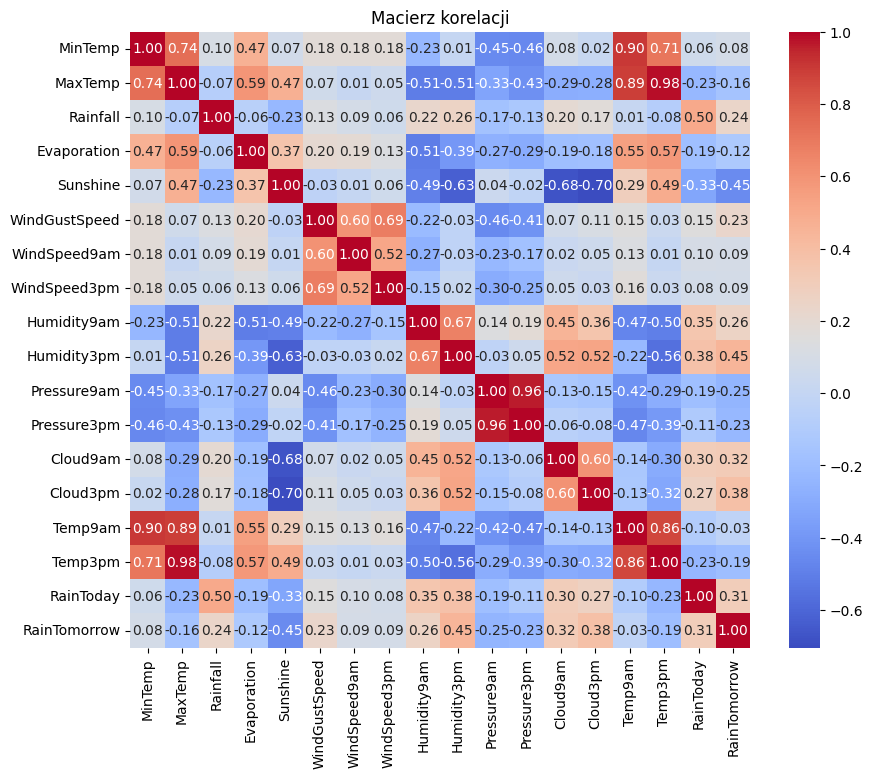

In [10]:
# Korelacja między zmiennymi liczbowymi
correlation = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

C:\Users\kapra\AppData\Local\Temp\ipykernel_19120\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


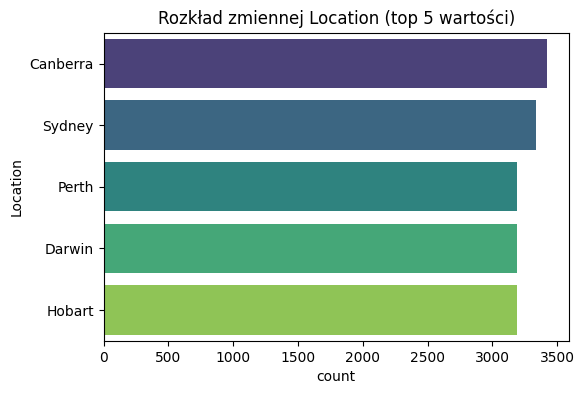

C:\Users\kapra\AppData\Local\Temp\ipykernel_19120\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


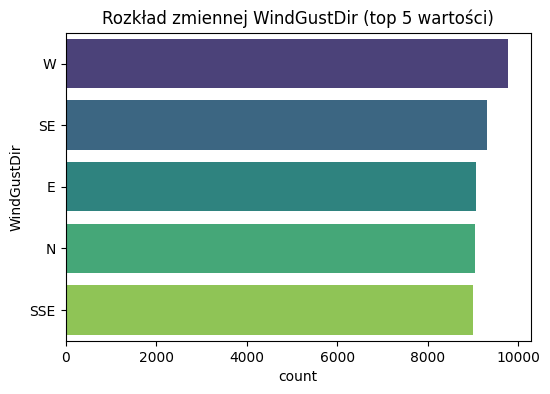

C:\Users\kapra\AppData\Local\Temp\ipykernel_19120\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


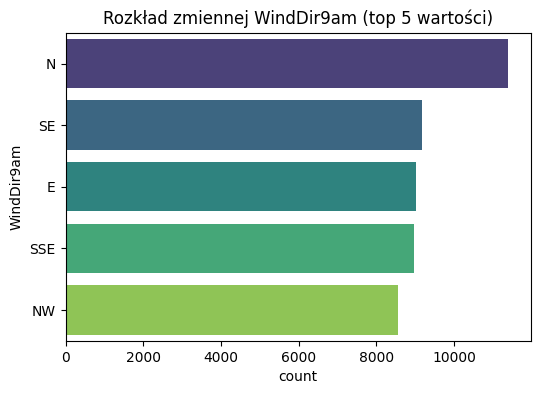

C:\Users\kapra\AppData\Local\Temp\ipykernel_19120\3903147148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)


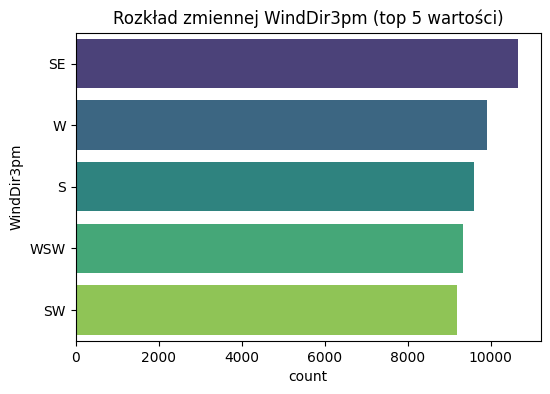

In [11]:
# Lista zmiennych kategorycznych, z wykluczeniem kolumny 'Date'
categorical_cols = data.select_dtypes(include=['category', 'object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Date']

# Tworzenie wykresów dla pozostałych kolumn kategorycznych
for column in categorical_cols:
    plt.figure(figsize=(6, 4))
    
    # Wybranie top 5 najczęstszych wartości w kolumnie
    top_5_values = data[column].value_counts().nlargest(5).index
    filtered_data = data[data[column].isin(top_5_values)]
    
    sns.countplot(y=filtered_data[column], palette="viridis", order=top_5_values)
    plt.title(f"Rozkład zmiennej {column} (top 5 wartości)")
    plt.show()


Pary zmiennych o wysokiej korelacji:
Temp3pm      MaxTemp        0.984562
MaxTemp      Temp3pm        0.984562
Pressure9am  Pressure3pm    0.961348
Pressure3pm  Pressure9am    0.961348
MinTemp      Temp9am        0.901813
Temp9am      MinTemp        0.901813
             MaxTemp        0.887020
MaxTemp      Temp9am        0.887020
Temp3pm      Temp9am        0.860574
Temp9am      Temp3pm        0.860574
MaxTemp      MinTemp        0.736267
MinTemp      MaxTemp        0.736267
Temp3pm      MinTemp        0.708865
MinTemp      Temp3pm        0.708865
dtype: float64


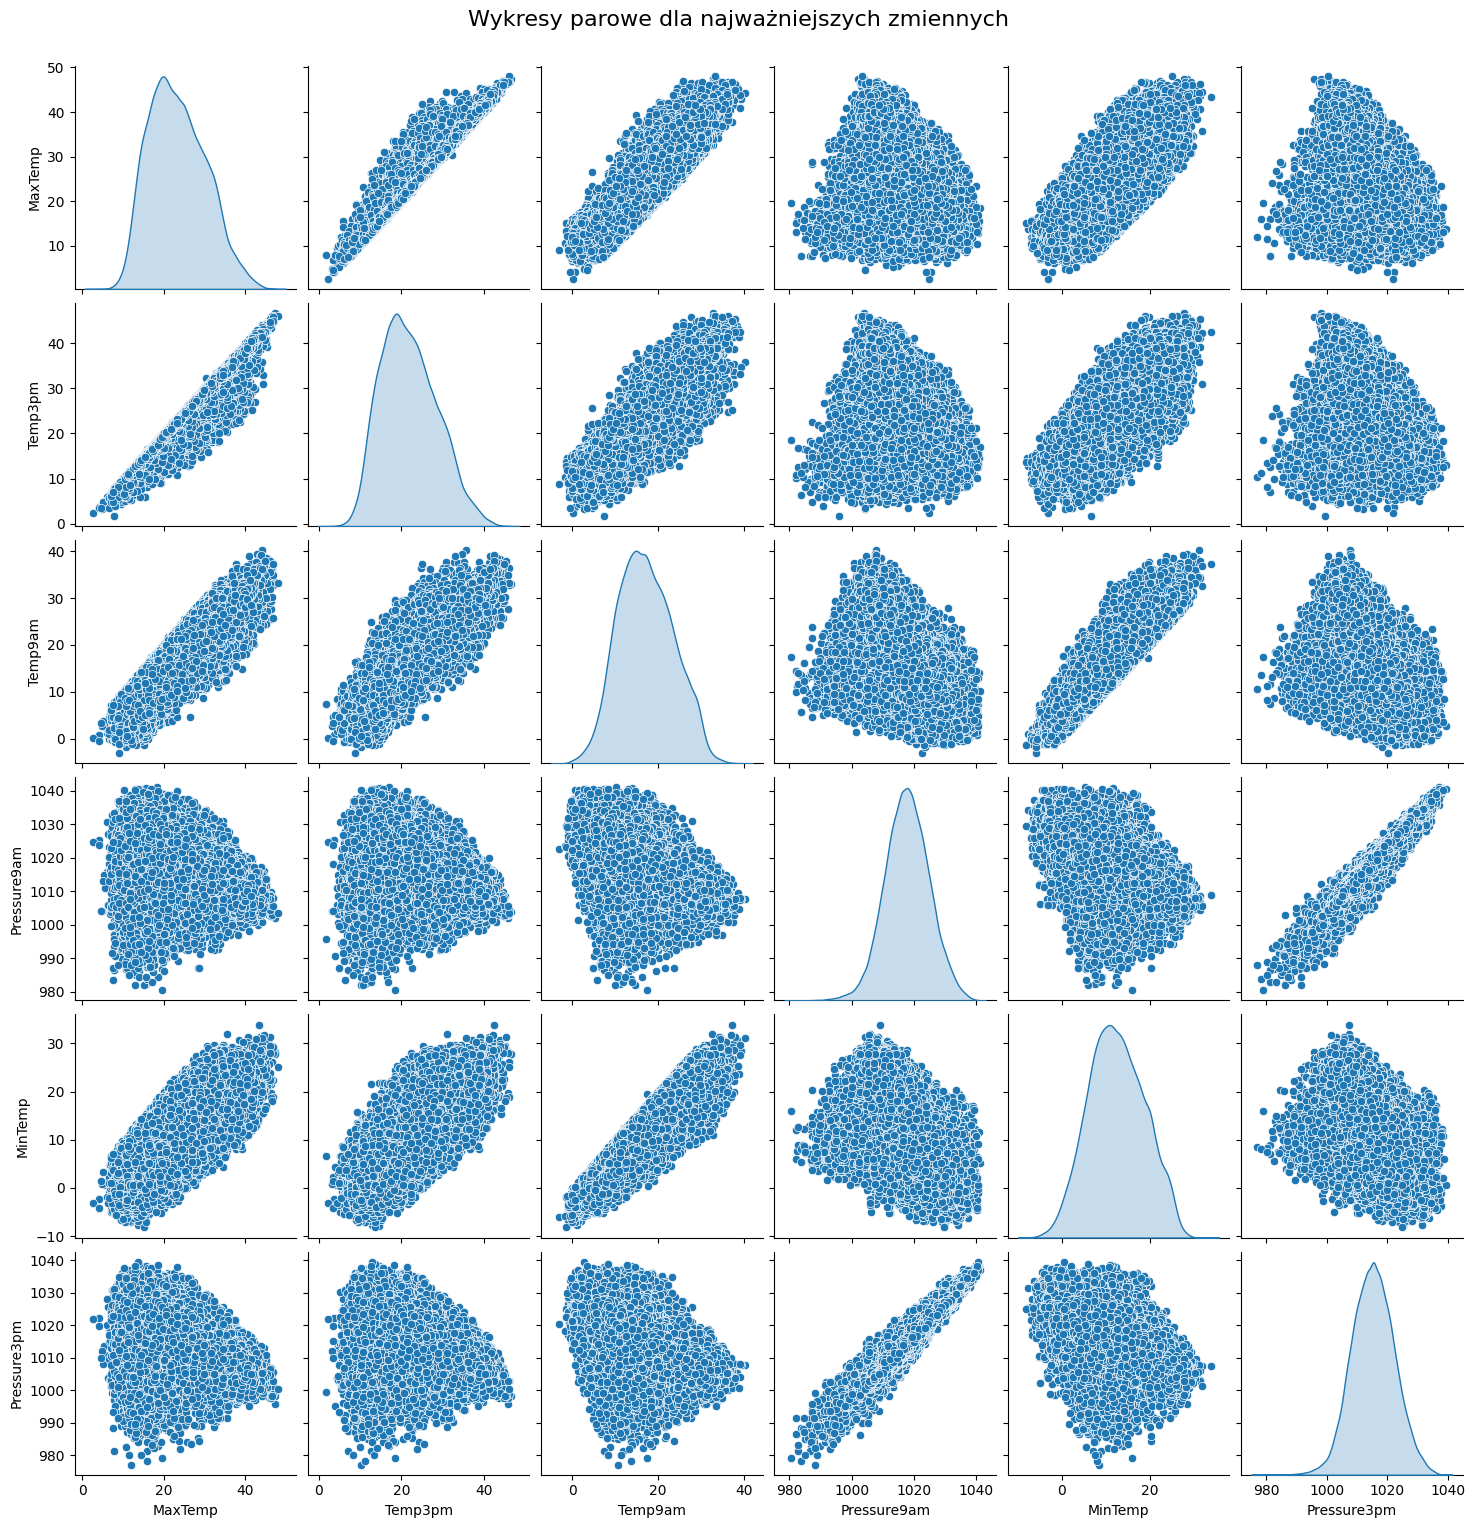

In [12]:
# Obliczanie macierzy korelacji dla zmiennych liczbowych
correlation_matrix = data[numeric_cols].corr()

# Znalezienie par zmiennych o najwyższej korelacji (bez diagonalnych 1.0)
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = correlation_pairs[
    (correlation_pairs < 1) & (correlation_pairs > 0.7)
]  # Korelacje powyżej 0.7

# Wyświetlenie par zmiennych o wysokiej korelacji
print("Pary zmiennych o wysokiej korelacji:")
print(high_correlation_pairs)

# Wybór unikalnych zmiennych do wykresów
important_columns = list(set([index[0] for index in high_correlation_pairs.index] + 
                             [index[1] for index in high_correlation_pairs.index]))

# Wygenerowanie wykresów parowych dla tych zmiennych
sns.pairplot(data[important_columns].dropna(), diag_kind="kde")
plt.suptitle("Wykresy parowe dla najważniejszych zmiennych", y=1.02, fontsize=16)
plt.show()


In [13]:
from sklearn.impute import SimpleImputer

# Sprawdzenie brakujących wartości
print("Brakujące wartości przed imputacją:")
print(data.isnull().sum())

# Wybór zmiennych liczbowych do imputacji
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Tworzenie modelu SimpleImputer z użyciem średniej
imputer = SimpleImputer(strategy='mean')

# Dopasowanie i transformacja zmiennych liczbowych
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Sprawdzenie braków po imputacji
print("\nBrakujące wartości po imputacji (zmienne liczbowe):")
print(data.isnull().sum())



Brakujące wartości przed imputacją:
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

Brakujące wartości po imputacji (zmienne liczbowe):
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
P

In [14]:
print("Pierwsze 5 wierszy danych:")
display(data.head())

Pierwsze 5 wierszy danych:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [15]:
# Wybierz kolumny dotyczące kierunku wiatru
wind_direction_columns = ['WindDir9am', 'WindDir3pm', 'WindGustDir']

# Wykonaj one-hot encoding tylko dla tych kolumn
data_encoded = pd.get_dummies(data, columns=wind_direction_columns, drop_first=True)

# Wyświetl pierwsze wiersze dla sprawdzenia
data_encoded.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,...,False,False,False,False,False,False,False,True,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,...,False,False,False,False,False,False,False,False,True,False
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,...,False,False,False,False,False,False,False,False,False,True
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,...,False,False,False,False,False,False,False,True,False,False


In [16]:
final_frame = data_encoded.drop(['Date', 'Location'], axis=1)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
features = final_frame.drop(["RainTomorrow"], axis=1)
target = final_frame["RainTomorrow"]
x_train, x_test, y_train, y_test = train_test_split(features, target, stratify=target) # stratify= target, żeby takie same proporcje klas były w obydwu próbkach

In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
preds = rfc.predict(x_test)
preds_proba = rfc.predict_proba(x_test)

In [21]:
preds_proba = preds_proba[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score, log_loss

eval_metrics = {}
eval_metrics['auc'] = roc_auc_score(y_test, preds_proba)
eval_metrics['binary_cross_entropy'] = log_loss(y_test, preds_proba)

print(eval_metrics)

{'auc': np.float64(0.8829780027774415), 'binary_cross_entropy': 0.3528220300413352}


Pierwszy testowany model, las losowy pozwolił wytrenować całkiem przyzwoity model auc 0.87-0.88 to całkiem dobry wynik, entropia krzyżowa 0.34-0.35 to też w porządku wynik, następnie sprawdzimy czy uda się wytrenować lepszy model, korzystając z dostrajania hiperparametrów


In [23]:
from sklearn.model_selection import RandomizedSearchCV
forest_params = {
    'n_estimators': range(100,500),  
    'max_depth': [None, 10, 20, 30, 40, 50],    
    'min_samples_split': range(2,20),       
    'min_samples_leaf': range(1,20),          
    'max_features': ['sqrt', 'log2'],   
    'bootstrap': [True, False]                  
}
forest_classifier = RandomForestClassifier()
forest_random_search = RandomizedSearchCV(
    estimator=forest_classifier,
    param_distributions=forest_params,
    n_iter=10,  # 10 iteracji poszukiwań to nie jest zbyt dużo, ale random forest to dosyć wymagający model i nawet taka ilość prób zajmuje sporo czasu
    scoring='neg_log_loss',
    random_state=42,  
    n_jobs=-1  
)

In [58]:
forest_random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(2, 20),
                                        'n_estimators': range(100, 500)},
                   scoring='neg_log_loss')

In [59]:
tuned_preds = forest_random_search.best_estimator_.predict_proba(x_test)[:,1]

In [60]:
eval_metrics_after_tuning = {}
eval_metrics_after_tuning['auc'] = roc_auc_score(y_test, tuned_preds)
eval_metrics_after_tuning['binary_cross_entropy'] = log_loss(y_test, tuned_preds)

print(eval_metrics_after_tuning)

{'auc': np.float64(0.8799652769783854), 'binary_cross_entropy': 0.34561709876021535}


Po procesie strojenia hiperparametrów nie udało się zyskać znaczącej poprawy jakości klasyfikacji, sprawdzimy czy model xgboost będzie lepszy

In [24]:
import xgboost as xgb


In [25]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic")
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
xgb_preds = xgb_classifier.predict_proba(x_test)[:,1]
train_preds = xgb_classifier.predict_proba(x_train)[:,1]

In [27]:
eval_metrics_xgb = {}
eval_metrics_xgb['auc'] = roc_auc_score(y_test, xgb_preds)
eval_metrics_xgb['train_auc'] = roc_auc_score(y_train, train_preds)# sprawdzamy też metryki na danych treningowych żeby sprawdzić czy model jest przetrenowany
eval_metrics_xgb['binary_cross_entropy'] = log_loss(y_test, xgb_preds)
eval_metrics_xgb['train_binary_cross_entropy'] = log_loss(y_train, train_preds)

print(eval_metrics_xgb)

{'auc': np.float64(0.8879991229611555), 'train_auc': np.float64(0.9292143883913346), 'binary_cross_entropy': 0.33088304048105305, 'train_binary_cross_entropy': 0.2737328331796177}


wyniki podobne do lasów losowych, xgboost jest jeszcze bardziej wymagający więc rezygnujemy z dostrajania, ale sprawdzimy czy uda się uzyskać lepszy model manualnie dopasowując hiperparametry

In [28]:
xgb_classifier2 = xgb.XGBClassifier(objective="binary:logistic", max_depth= 9, n_estimators = 1000, eta=0.01, min_child_weight=5, gamma=1, colsample_bytree=1, reg_lambda = 2, eval_metric="auc", early_stopping_rounds = 30)
xgb_classifier2.fit(x_train, y_train,eval_set=[(x_train, y_train), (x_test, y_test)], verbose=True)

[0]	validation_0-auc:0.86873	validation_1-auc:0.85467
[1]	validation_0-auc:0.87081	validation_1-auc:0.85662
[2]	validation_0-auc:0.87087	validation_1-auc:0.85689
[3]	validation_0-auc:0.87543	validation_1-auc:0.86198
[4]	validation_0-auc:0.87633	validation_1-auc:0.86225
[5]	validation_0-auc:0.87649	validation_1-auc:0.86216
[6]	validation_0-auc:0.87758	validation_1-auc:0.86279
[7]	validation_0-auc:0.87816	validation_1-auc:0.86282
[8]	validation_0-auc:0.87832	validation_1-auc:0.86283
[9]	validation_0-auc:0.87897	validation_1-auc:0.86322
[10]	validation_0-auc:0.87928	validation_1-auc:0.86340
[11]	validation_0-auc:0.87957	validation_1-auc:0.86346
[12]	validation_0-auc:0.87982	validation_1-auc:0.86353
[13]	validation_0-auc:0.87995	validation_1-auc:0.86348
[14]	validation_0-auc:0.88022	validation_1-auc:0.86358
[15]	validation_0-auc:0.88039	validation_1-auc:0.86388
[16]	validation_0-auc:0.88064	validation_1-auc:0.86392
[17]	validation_0-auc:0.88085	validation_1-auc:0.86417
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=30, enable_categorical=False,
              eta=0.01, eval_metric='auc', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
xgb_preds2 = xgb_classifier2.predict_proba(x_test)[:,1]
train_preds2 = xgb_classifier2.predict_proba(x_train)[:,1]

In [30]:
eval_metrics_xgb2 = {}
eval_metrics_xgb2['auc'] = roc_auc_score(y_test, xgb_preds2)
eval_metrics_xgb2['train_auc'] = roc_auc_score(y_train, train_preds2)
eval_metrics_xgb2['binary_cross_entropy'] = log_loss(y_test, xgb_preds2)
eval_metrics_xgb2['train_binary_cross_entropy'] = log_loss(y_train, train_preds2)

print(eval_metrics_xgb2)

{'auc': np.float64(0.8901485164912513), 'train_auc': np.float64(0.936102664086906), 'binary_cross_entropy': 0.32801279771070646, 'train_binary_cross_entropy': 0.2675672311459344}


Po próbach dostosowania hiperparametrów, nie udało się znacząco poprawić jakości klasyfikacji, większość zmian hiperparametrów prowadziło do przetrenowania modelu, mimo tego za pomocą xgboost oraz lasu losowego udało się stworzyć całkiem silne modele z auc rzędu 0.88 i entropią krzyżową 0.33-0.34

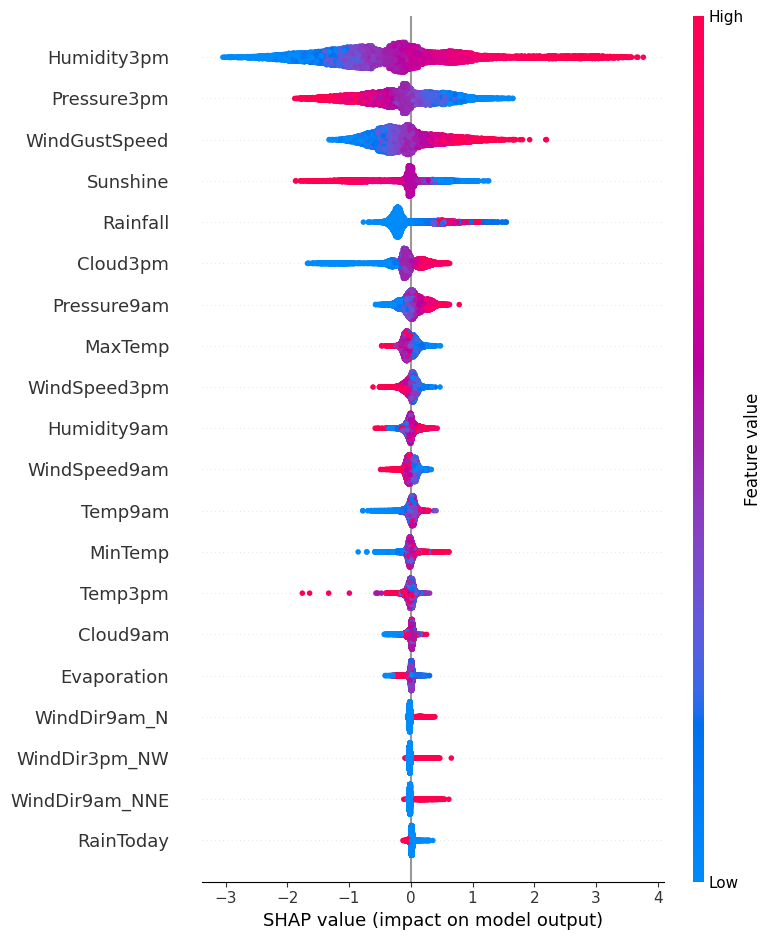

In [ ]:
import shap

subset = x_train.sample(n=15000, random_state=42) #wybieramy próbkę, bo cały dataset wymaga za dużo czasu i pamięci do wygenerowania shap values
explainer = shap.TreeExplainer(xgb_classifier2)
shap_values = explainer.shap_values(subset)

shap.summary_plot(shap_values, subset)

Na powyższym wykresie widzimy impakt zmiennych na model, największy ma Humidity3PM, co pokrywa się też z macierzą korelacji z wcześniejszego fragmentu notebooka, ogólnie ten wykres należy interpretować w następujący sposób: jeżeli wykres danej zmiennej rościąga się w lewo, znaczy to, że ma ona wpływ na klasę negatywną, w naszym przypadku to znaczy, że jeżeli wykres zmiennej przeciąga się w lewo to niesie ona informację o braku deszcze w następny dzień, kolor wykresu natomiast informuje o wartościach zmiennych. Przykładowo duża wartość wilgotności (Humidity3pm) ma pozytywny wpływ na prognozę deszczu, a niska negatywny.

In [35]:
from sklearn.metrics import classification_report

xgb_preds2_classes = xgb_classifier2.predict(x_test)

report = classification_report(y_test, xgb_preds2_classes)

print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     27580
         1.0       0.75      0.54      0.63      7969

    accuracy                           0.86     35549
   macro avg       0.82      0.75      0.77     35549
weighted avg       0.85      0.86      0.85     35549



Patrząc na raport klasyfikacji uwagę zwraca niższa wartość recall, znaczy to, że model miał tendencję do produkowania fałszywych negatywów, tzn zdarzało mu się prognozować brak deszczu w dni gdzie deszcz jednak padał, ogólnie mimo tego udało się utworzyć całkiem silny model, ale nie perfekcyjny

In [37]:
report_forest = classification_report(y_test, preds)

print(report_forest)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     27580
         1.0       0.76      0.51      0.61      7969

    accuracy                           0.85     35549
   macro avg       0.82      0.73      0.76     35549
weighted avg       0.85      0.85      0.84     35549



Patrząc na raport klasyfikacji z lasu losowego widzimy bardzo podobne wyniki

Podsumowując, najlepszym modelem okazała się druga iteracja z xgboostem, największą jego słabością jest pordukowanie fałszywych negatywów, a najbardziej istotną zmienną jest Humidity3pm